# imports #

In [48]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


import math as mat

%matplotlib inline

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])

# Data points and features

In [3]:
type(data)

numpy.ndarray

In [4]:
data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 3.9690e+02, 4.9800e+00,
        2.4000e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 3.9690e+02, 9.1400e+00,
        2.1600e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 3.9283e+02, 4.0300e+00,
        3.4700e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 5.6400e+00,
        2.3900e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 3.9345e+02, 6.4800e+00,
        2.2000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 3.9690e+02, 7.8800e+00,
        1.1900e+01]])

# Data exploration with pandas

In [5]:
bst_df = pd.DataFrame(data)
bst_df = bst_df.rename(columns={0:'crime', 1:'zn', 2:'indus', 3:'chas', 4:'nox', 5:'rm', 6:'age', 7:'dis', 8:'rad', 9:'tax', 10:'pt_ratio', 11:'b', 12:'l_stat', 13:'price'})

In [6]:
bst_df.head()

crime    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   pt_ratio       b  l_stat  price  
0      15.3  396.90    4.98   24.0  
1      17.8  396.90    9.14   21.6  
2      17.8  392.83    4.03   34.7  
3      18.7  394.63    2.94   33.4  
4      18.7  396.90    5.33   36.2

In [7]:
bst_df.tail()

crime   zn  indus  chas    nox     rm   age     dis  rad    tax  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     pt_ratio       b  l_stat  price  
501      21.0  391.99    9.67   22.4  
502      21.0  396.90    9.08   20.6  
503      21.0  396.90    5.64   23.9  
504      21.0  393.45    6.48   22.0  
505      21.0  396.90    7.88   11.9

In [8]:
bst_df

crime    zn  indus  chas    nox     rm   age     dis  rad    tax  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...    ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741   0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     pt_ratio       b  l_stat  price  
0        15.3  396.90    4.98   24.0  
1        17.8  396.90    9.14   21.6  
2        17.8  392.83    4.03   34.7  
3        18.7  394.63    2.94   33.4  
4        18.7  396.90    5.33   36.2  
..        ...     ...     ...    ...  
501      21.0  391.99    9.67   22.4  
502      21.0  396.90    9.08   20.6  
503      21.0  396.90    5.64   23.9  
504      21.0  393.45    6.48   22.0  
505      21.0  396.90    7.88   11.9  

[506 rows x 14 columns]

### CRIM  --   per capita crime rate by town
### ZN   --   proportion of residential land zoned for lots over 25,000 sq.ft.
### INDUS  --  proportion of non-retail business acres per town
### CHAS   --  Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
### NOX   --   nitric oxides concentration (parts per 10 million)
### RM    --   average number of rooms per dwelling
### AGE   --   proportion of owner-occupied units built prior to 1940
### DIS   --   weighted distances to five Boston employment centres
### RAD   --   index of accessibility to radial highways
### TAX   --   full-value property-tax rate per $10,000
### PTRATIO -- pupil-teacher ratio by town
### B    --
### LSTAT  --  % lower status of the population
### MEDV  --   median value of owner-occupied homes in 1000's

## cleaning data

In [9]:
bst_df.isnull().any()

crime       False
zn          False
indus       False
chas        False
nox         False
rm          False
age         False
dis         False
rad         False
tax         False
pt_ratio    False
b           False
l_stat      False
price       False
dtype: bool

In [10]:
bst_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   crime     506 non-null    float64
 1   zn        506 non-null    float64
 2   indus     506 non-null    float64
 3   chas      506 non-null    float64
 4   nox       506 non-null    float64
 5   rm        506 non-null    float64
 6   age       506 non-null    float64
 7   dis       506 non-null    float64
 8   rad       506 non-null    float64
 9   tax       506 non-null    float64
 10  pt_ratio  506 non-null    float64
 11  b         506 non-null    float64
 12  l_stat    506 non-null    float64
 13  price     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


 ## Histograms, Distributions & Bar Charts

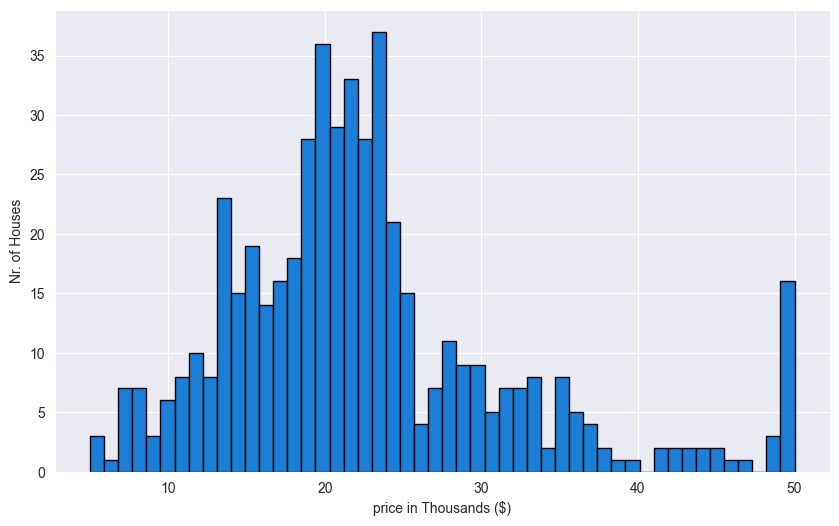

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(bst_df['price'], bins=50, ec='black', color='#1c7ed6')
plt.xlabel('price in Thousands ($)')
plt.ylabel('Nr. of Houses')
plt.show()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_1856\1618837060.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(bst_df['price'], bins=50, hist=True, kde=False, color='#1c7ed6')


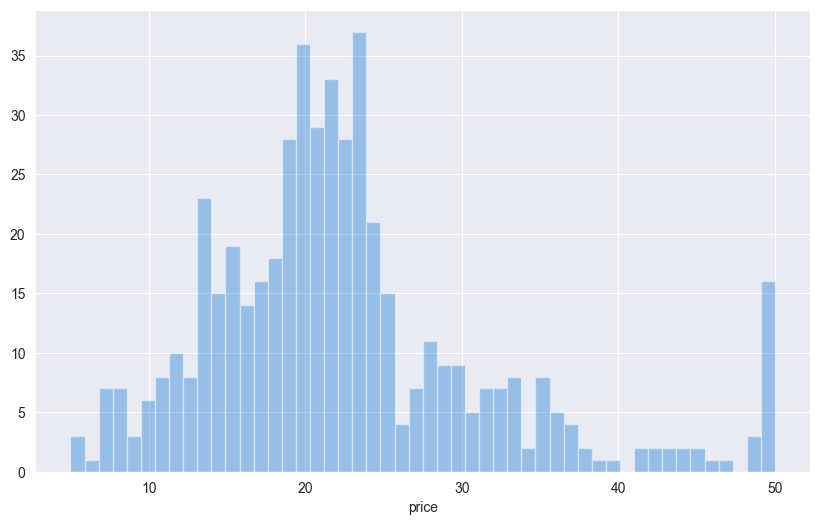

In [12]:
plt.figure(figsize=(10, 6))
sns.distplot(bst_df['price'], bins=50, hist=True, kde=False, color='#1c7ed6')
plt.show()

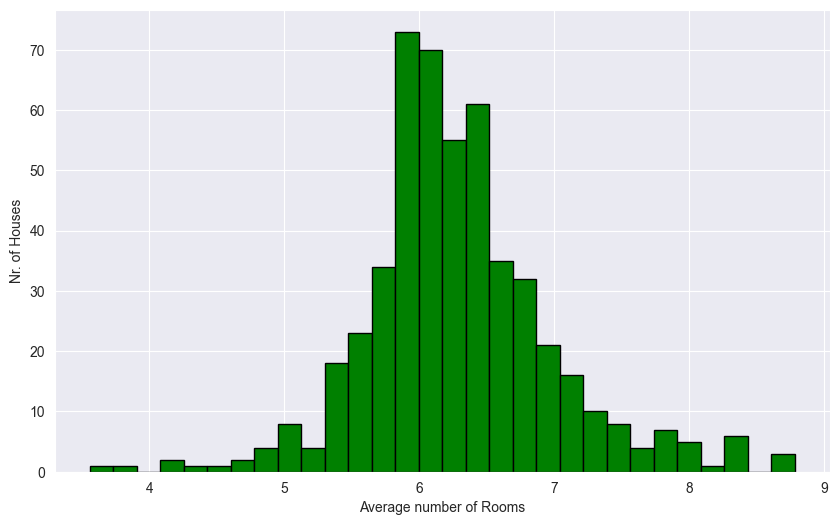

In [13]:
plt.figure(figsize=(10, 6))
plt.hist(bst_df['rm'], bins=30, color='green', ec='black')
plt.xlabel('Average number of Rooms')
plt.ylabel('Nr. of Houses')
plt.show()

In [14]:
bst_df['rad']

0      1.0
1      2.0
2      2.0
3      3.0
4      3.0
      ... 
501    1.0
502    1.0
503    1.0
504    1.0
505    1.0
Name: rad, Length: 506, dtype: float64

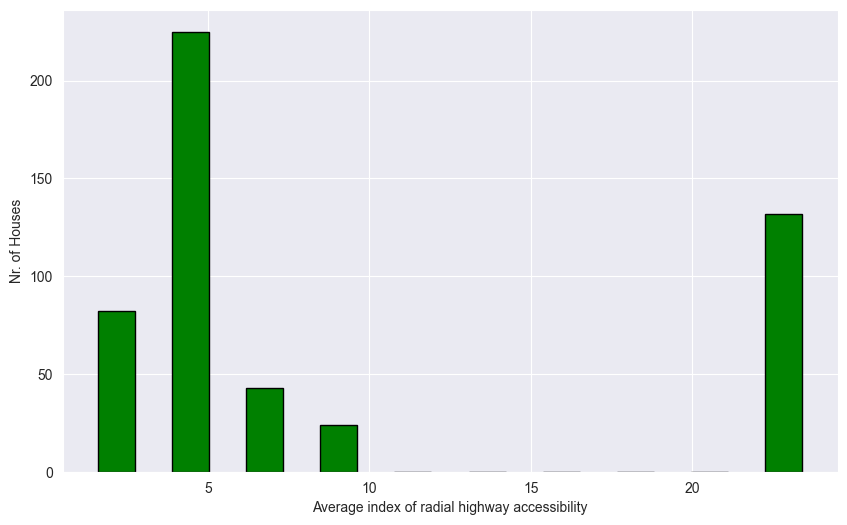

In [15]:
plt.figure(figsize=(10, 6))
plt.hist(bst_df['rad'], color='green', ec='black', bins=10, rwidth=0.5)
plt.xlabel('Average index of radial highway accessibility')
plt.ylabel('Nr. of Houses')
plt.show()

In [16]:
bst_df['rad'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
2.0      24
8.0      24
1.0      20
7.0      17
Name: rad, dtype: int64

In [17]:
frequency = bst_df['rad'].value_counts()
type(frequency)

pandas.core.series.Series

In [18]:
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 2.0, 8.0, 1.0, 7.0], dtype='float64')

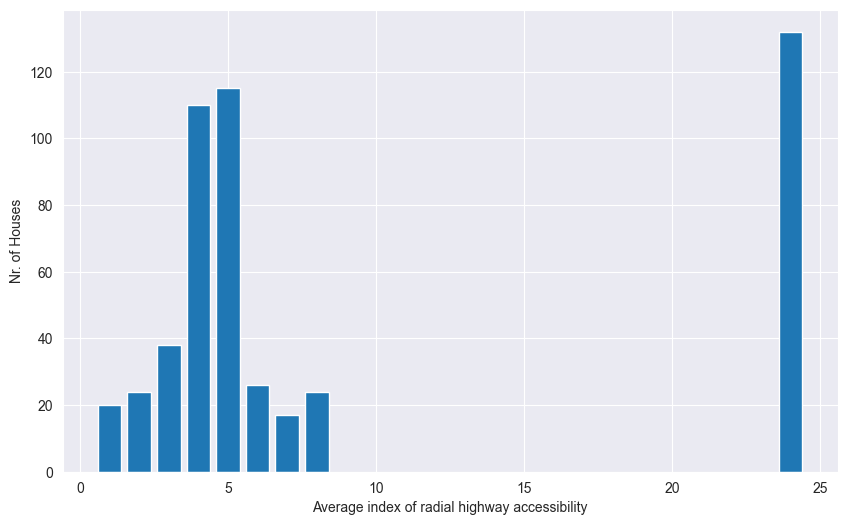

In [19]:
plt.figure(figsize=(10, 6))
plt.bar(frequency.index, height=frequency)
plt.xlabel('Average index of radial highway accessibility')
plt.ylabel('Nr. of Houses')
plt.show()

In [20]:
bst_df.chas.value_counts()

0.0    471
1.0     35
Name: chas, dtype: int64

# Descriptive Statistics

In [21]:
bst_df['price'].min()

5.0

In [22]:
bst_df['price'].max()

50.0

In [23]:
bst_df.describe()

crime          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax    pt_ratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

           l_stat       price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
$$ \rho _{XY} = corr(X, Y) $$
$$ -1 \leq \rho _{XY} \leq +1 $$

In [24]:
bst_df['price'].corr(bst_df['rm'])

0.6953599470715393

In [25]:
bst_df['price'].corr(bst_df['pt_ratio'])

-0.5077866855375616

In [26]:
bst_df.corr()

crime        zn     indus      chas       nox        rm  \
crime     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247   
zn       -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991   
indus     0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676   
chas     -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251   
nox       0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188   
rm       -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000   
age       0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265   
dis      -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246   
rad       0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847   
tax       0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048   
pt_ratio  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501   
b        -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069   
l_stat    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808   
price    -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360   

               age       dis       rad       tax  pt_ratio         b  \
crime     0.352734 -0.379670  0.625505  0.582764  0.289946 -0.385064   
zn       -0.569537  0.664408 -0.311948 -0.314563 -0.391679  0.175520   
indus     0.644779 -0.708027  0.595129  0.720760  0.383248 -0.356977   
chas      0.086518 -0.099176 -0.007368 -0.035587 -0.121515  0.048788   
nox       0.731470 -0.769230  0.611441  0.668023  0.188933 -0.380051   
rm       -0.240265  0.205246 -0.209847 -0.292048 -0.355501  0.128069   
age       1.000000 -0.747881  0.456022  0.506456  0.261515 -0.273534   
dis      -0.747881  1.000000 -0.494588 -0.534432 -0.232471  0.291512   
rad       0.456022 -0.494588  1.000000  0.910228  0.464741 -0.444413   
tax       0.506456 -0.534432  0.910228  1.000000  0.460853 -0.441808   
pt_ratio  0.261515 -0.232471  0.464741  0.460853  1.000000 -0.177383   
b        -0.273534  0.291512 -0.444413 -0.441808 -0.177383  1.000000   
l_stat    0.602339 -0.496996  0.488676  0.543993  0.374044 -0.366087   
price    -0.376955  0.249929 -0.381626 -0.468536 -0.507787  0.333461   

            l_stat     price  
crime     0.455621 -0.388305  
zn       -0.412995  0.360445  
indus     0.603800 -0.483725  
chas     -0.053929  0.175260  
nox       0.590879 -0.427321  
rm       -0.613808  0.695360  
age       0.602339 -0.376955  
dis      -0.496996  0.249929  
rad       0.488676 -0.381626  
tax       0.543993 -0.468536  
pt_ratio  0.374044 -0.507787  
b        -0.366087  0.333461  
l_stat    1.000000 -0.737663  
price    -0.737663  1.000000

In [27]:
mask = np.zeros_like(bst_df.corr())
triangel_inecies = np.triu_indices_from(mask)
mask[triangel_inecies] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

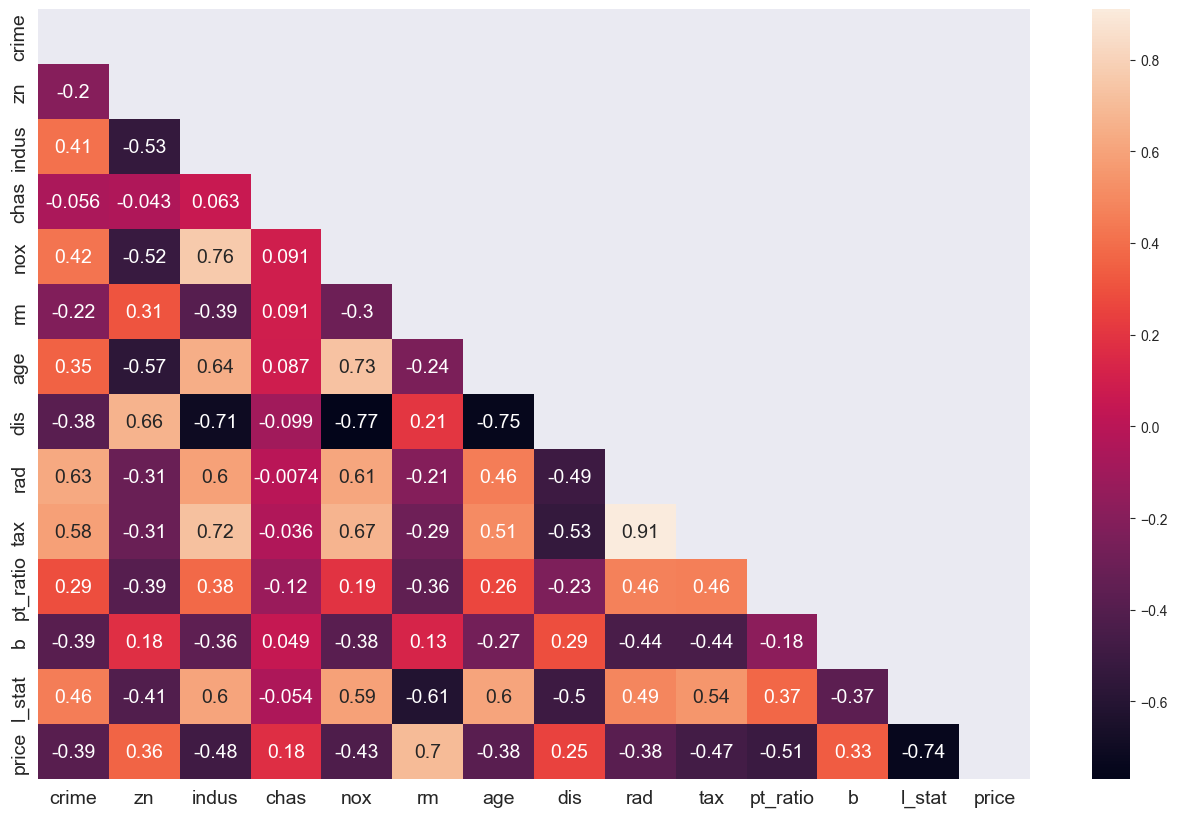

In [28]:
plt.figure(figsize=(16, 10))
sns.heatmap(bst_df.corr(), mask=mask, annot=True, annot_kws={"size":14})
sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

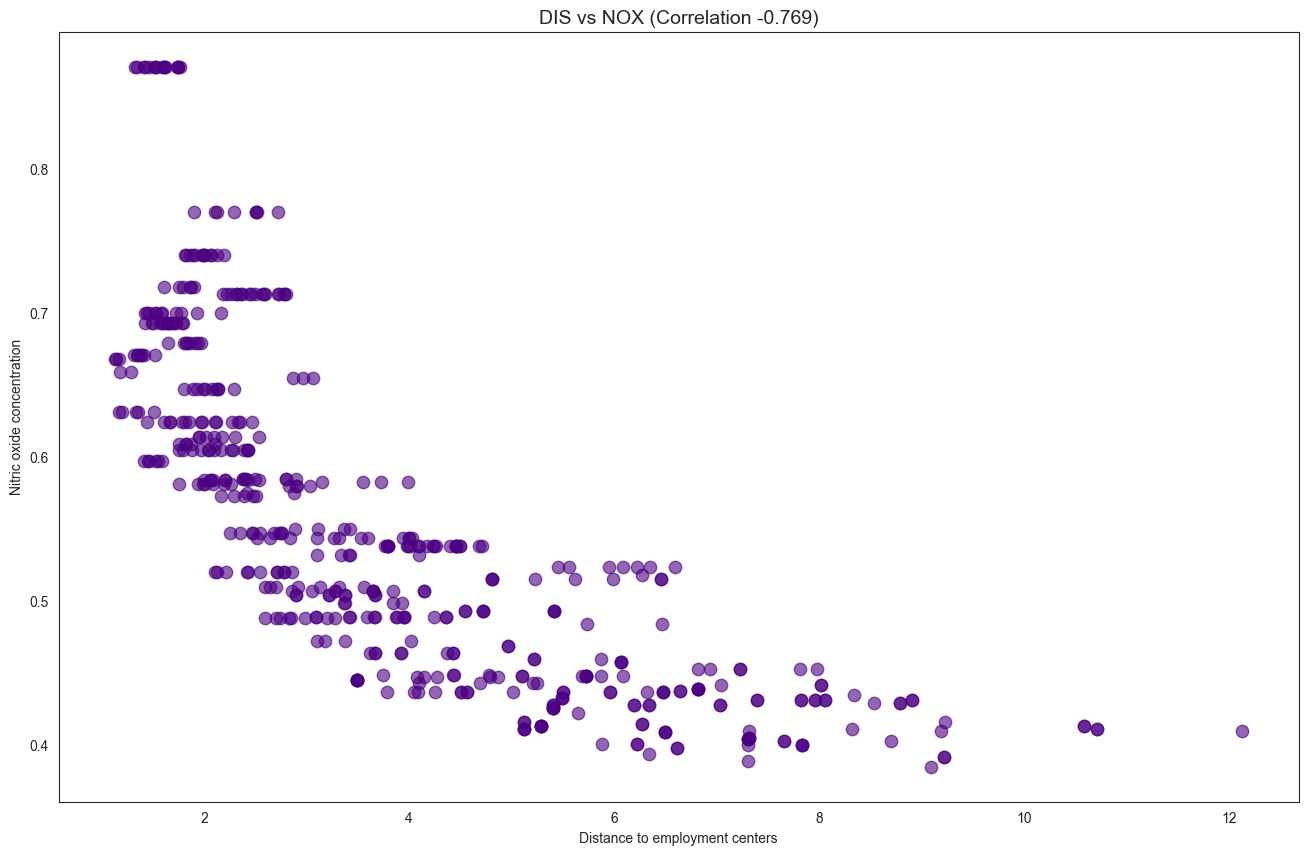

In [29]:
nox_dix_corr = round(bst_df['nox'].corr(bst_df['dis']), 3)

plt.figure(figsize=(16, 10))
plt.title(f'DIS vs NOX (Correlation {nox_dix_corr})', fontsize=14)
plt.scatter(bst_df.dis, bst_df.nox, alpha=0.6, s=80, color='indigo')
plt.ylabel('Nitric oxide concentration')
plt.xlabel('Distance to employment centers')
plt.show()

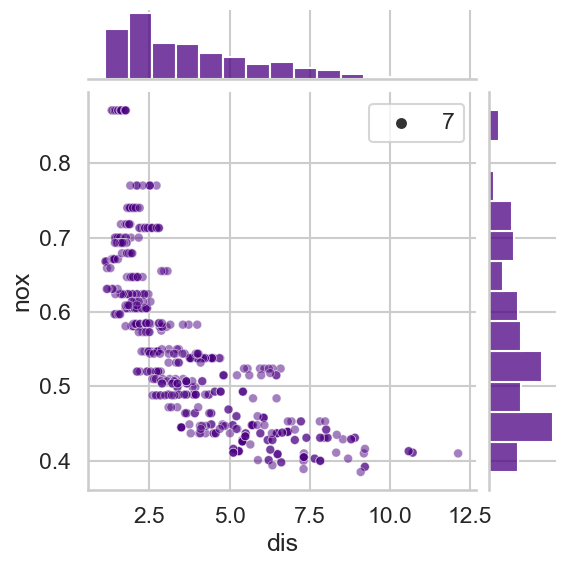

In [30]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=bst_df.dis, y=bst_df.nox, size=7, color='indigo', joint_kws={'alpha':0.5})
plt.show()

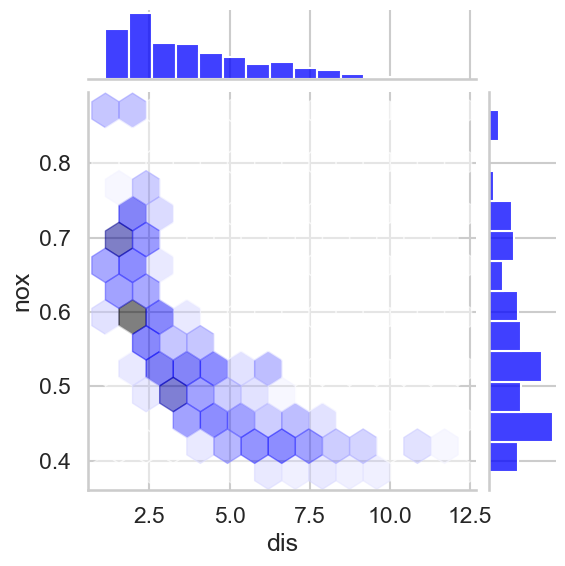

In [31]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=bst_df.dis, y=bst_df.nox, kind='hex', color='blue', joint_kws={'alpha':0.5})
plt.show()

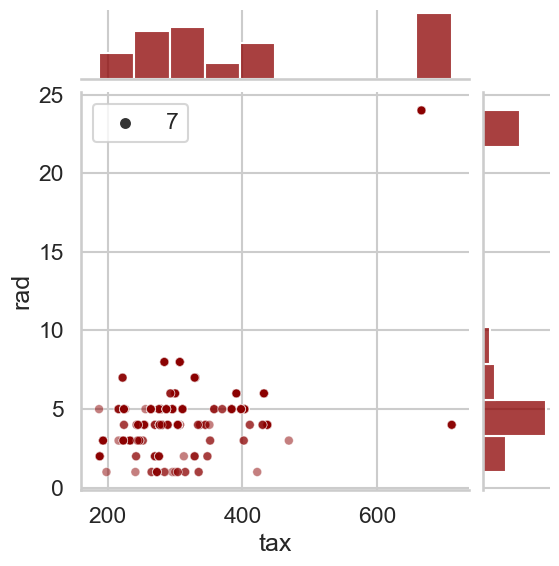

In [32]:
sns.set()
sns.set_context('talk')
sns.set_style('whitegrid')
sns.jointplot(x=bst_df.tax, y=bst_df.rad, size=7, color='darkred', joint_kws={'alpha':0.5})
plt.show()

<Figure size 1600x1000 with 0 Axes>

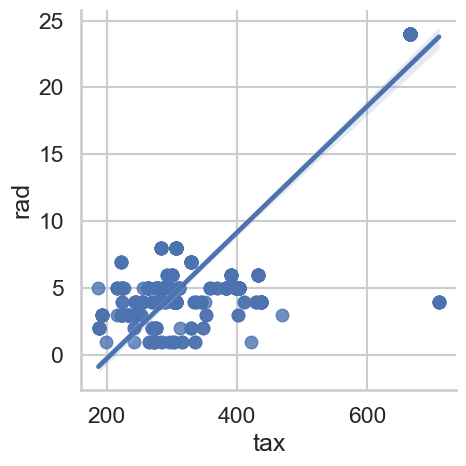

In [33]:
plt.figure(figsize=(16, 10))
sns.lmplot(x='tax', y='rad', data=bst_df)
plt.show()

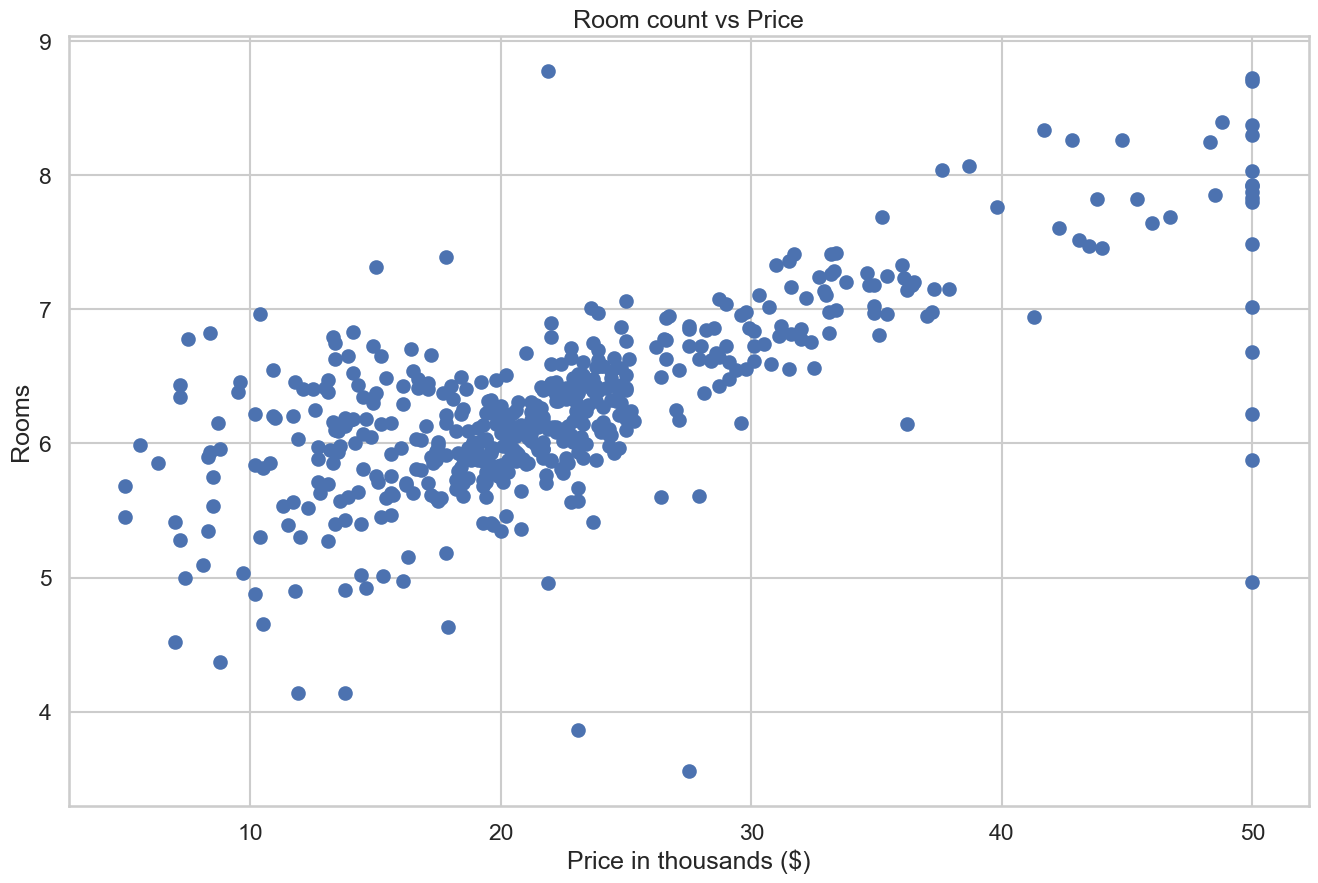

In [34]:
plt.figure(figsize=(16, 10))
plt.scatter(bst_df.price, bst_df.rm)
plt.title('Room count vs Price')
plt.xlabel('Price in thousands ($)')
plt.ylabel('Rooms')
plt.show()

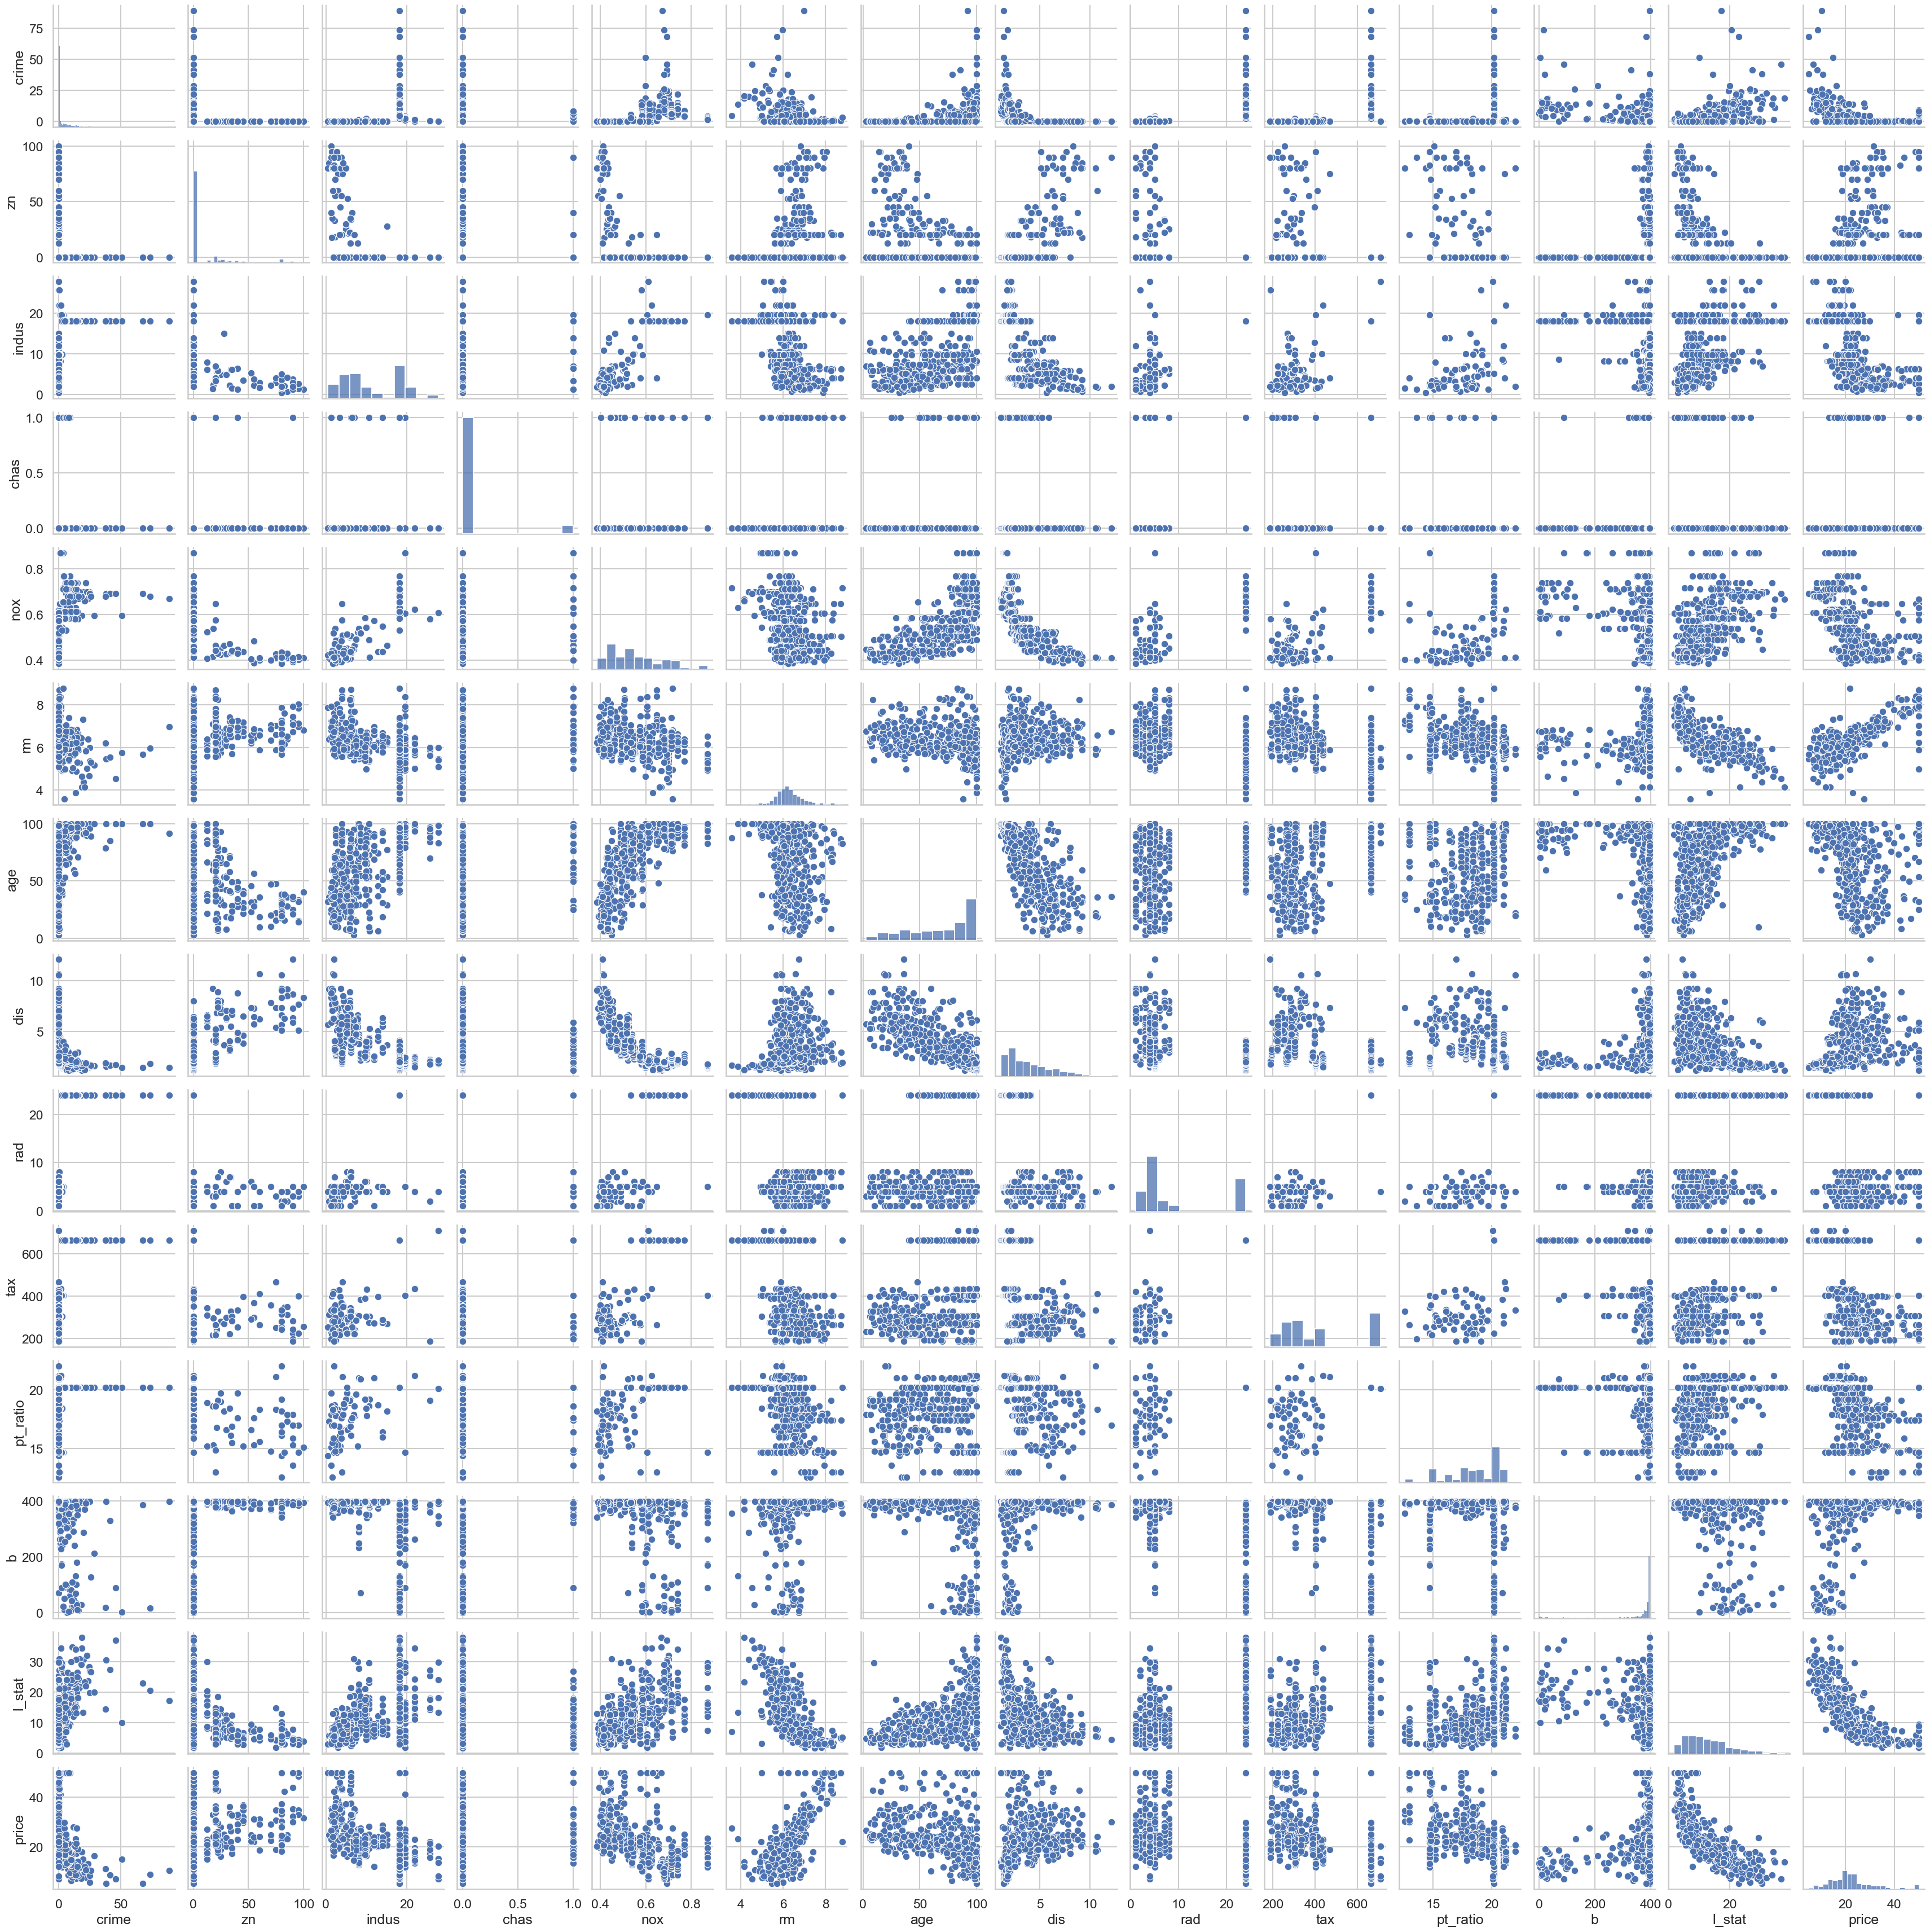

CPU times: total: 9.05 s
Wall time: 45.7 s


In [35]:
%%time
sns.pairplot(bst_df)
plt.show()

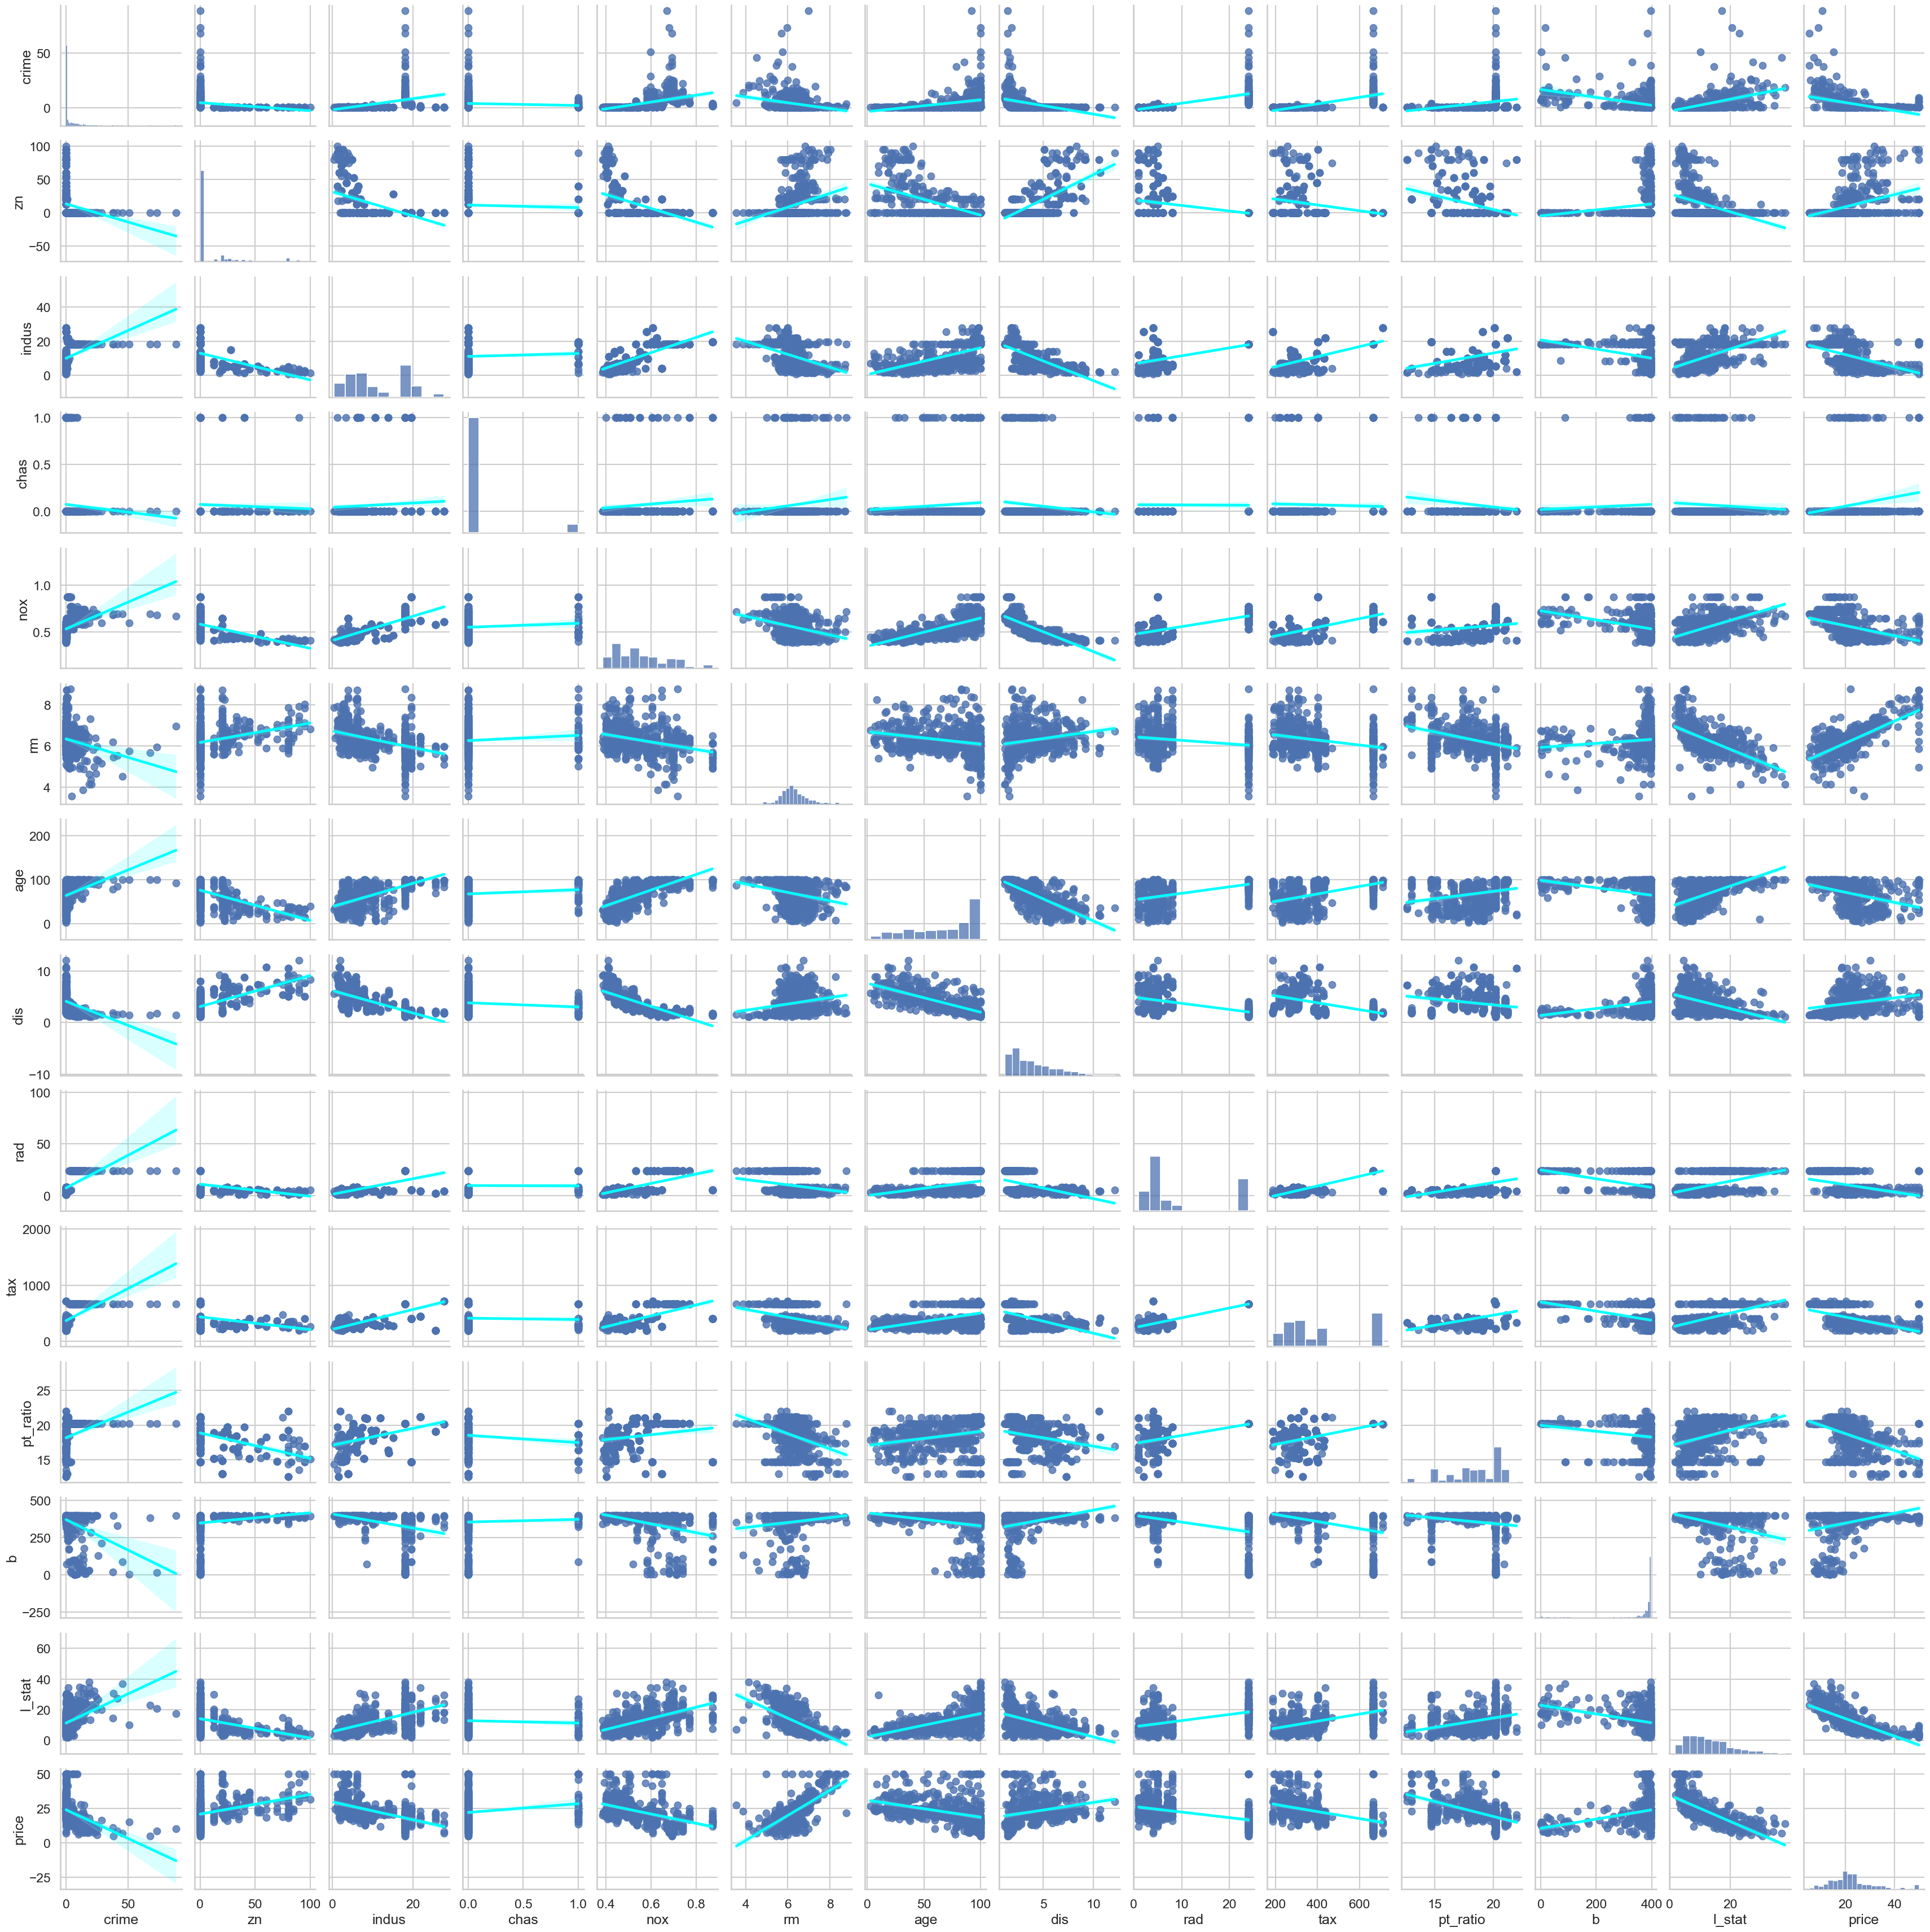

In [36]:
sns.pairplot(bst_df, kind='reg', plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

In [37]:
prices = bst_df.price
features = bst_df.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

len(x_train)/len(features)

0.7984189723320159

In [38]:
x_test.shape[0]/features.shape[0]

0.2015810276679842

# multivariable regression

In [39]:
regr = LinearRegression()
regr.fit(x_train, y_train)
print(f"Intercept {regr.intercept_}")
print(f"Training data r-squared: {regr.score(x_train, y_train)}")
print(f"Test data r-squared: {regr.score(x_test, y_test)}")
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Intercept 36.53305138282448
Training data r-squared: 0.750121534530608
Test data r-squared: 0.6709339839115642


coef
crime     -0.128181
zn         0.063198
indus     -0.007576
chas       1.974515
nox      -16.271989
rm         3.108456
age        0.016292
dis       -1.483014
rad        0.303988
tax       -0.012082
pt_ratio  -0.820306
b          0.011419
l_stat    -0.581626

## Data transformations

In [40]:
bst_df.price.skew()

1.1080984082549072

In [41]:
y_log = np.log(bst_df.price)
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: price, dtype: float64

In [42]:
y_log.skew()

-0.33032129530987864

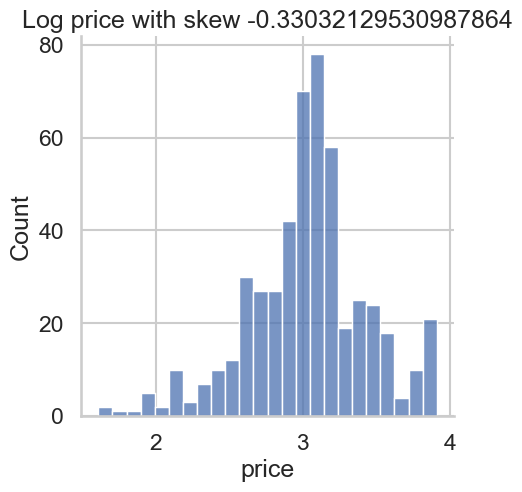

In [43]:
sns.displot(y_log)
plt.title(f'Log price with skew {y_log.skew()}')
plt.show()

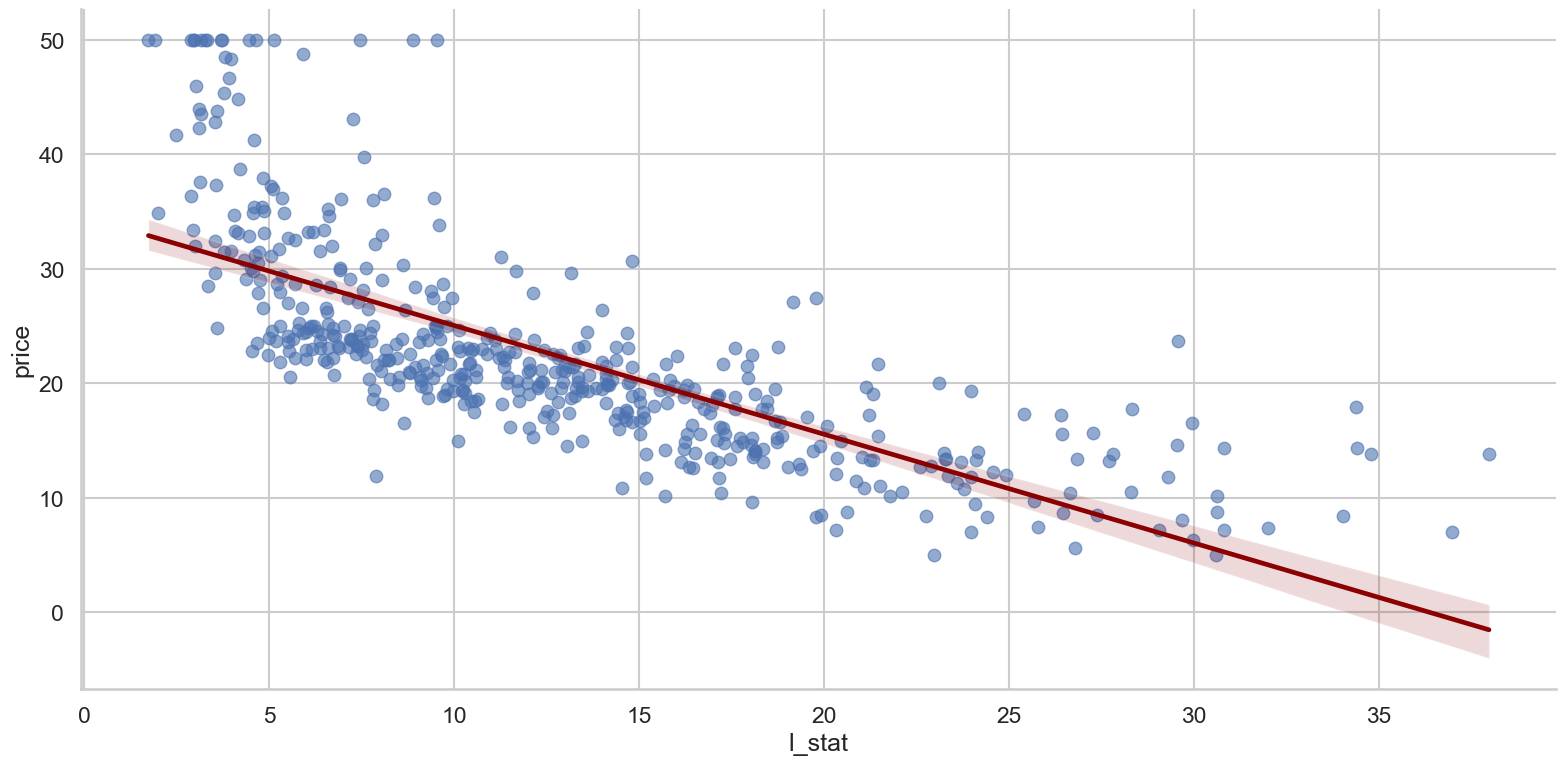

In [44]:
sns.lmplot(x='l_stat', y='price', data=bst_df, height=8, aspect=2, scatter_kws={'alpha':0.6}, line_kws={'color':'darkred'})
plt.show()

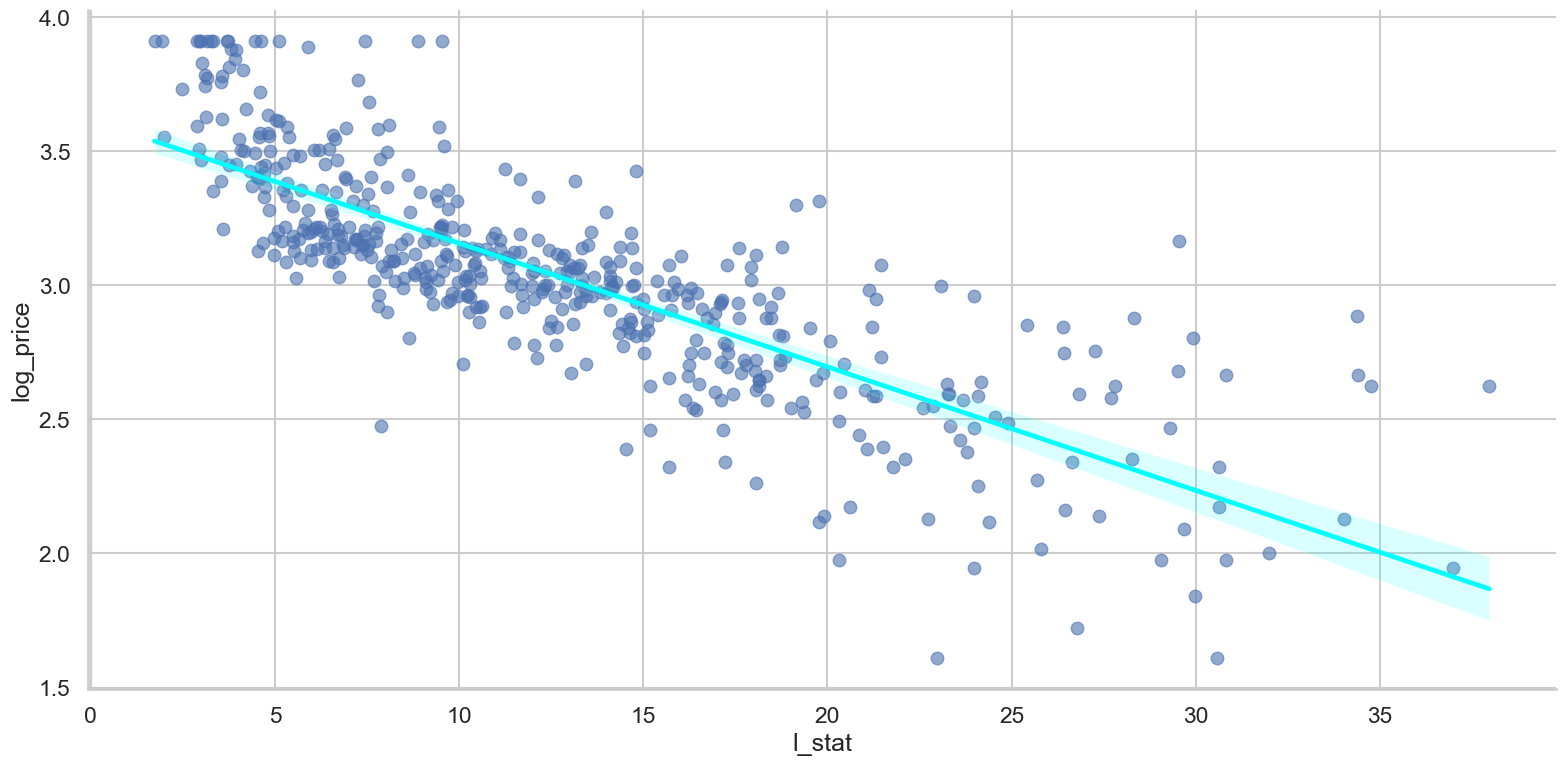

In [45]:
transformed_data = features
transformed_data['log_price'] = y_log

sns.lmplot(x='l_stat', y='log_price', data=transformed_data, height=8, aspect=2, scatter_kws={'alpha':0.6}, line_kws={'color':'cyan'})
plt.show()

## Regression using log_prices

In [46]:
prices = np.log(bst_df.price)
features = bst_df.drop('price', axis=1)

x_train, x_test, y_train, y_test = train_test_split(features, prices, test_size=0.2, random_state=10)

len(x_train)/len(features)
regr = LinearRegression()
regr.fit(x_train, y_train)
print(f"Intercept {regr.intercept_}")
print(f"Training data r-squared: {regr.score(x_train, y_train)}")
print(f"Test data r-squared: {regr.score(x_test, y_test)}")
pd.DataFrame(data=regr.coef_, index=x_train.columns, columns=['coef'])

Intercept 4.0599438717751966
Training data r-squared: 0.7930234826697584
Test data r-squared: 0.744692230626074


coef
crime    -0.010672
zn        0.001579
indus     0.002030
chas      0.080331
nox      -0.704068
rm        0.073404
age       0.000763
dis      -0.047633
rad       0.014565
tax      -0.000645
pt_ratio -0.034795
b         0.000516
l_stat   -0.031390

## P values & Evaluating Coefficients

In [47]:
x_include_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_include_constant)
results = model.fit()
# results.params
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})

coef  p-value
const     4.059944    0.000
crime    -0.010672    0.000
zn        0.001579    0.009
indus     0.002030    0.445
chas      0.080331    0.038
nox      -0.704068    0.000
rm        0.073404    0.000
age       0.000763    0.209
dis      -0.047633    0.000
rad       0.014565    0.000
tax      -0.000645    0.000
pt_ratio -0.034795    0.000
b         0.000516    0.000
l_stat   -0.031390    0.000

## Testing for Multicollinearity

$$ TAX = \alpha _0 + \alpha _1 rm + \alpha _2 nox + ... + \alpha _{12} l-stat$$

$$ VIF _{TAX} = \frac{1}{(1 - R_{TAX}^2)} $$

In [70]:
variance_inflation_factor(exog=x_include_constant.values, exog_idx=1)

1.7145250443932485

In [68]:
type(x_include_constant)

array([[1.00000e+00, 8.87300e-02, 2.10000e+01, ..., 1.68000e+01,
        3.95560e+02, 1.34500e+01],
       [1.00000e+00, 1.35222e+01, 0.00000e+00, ..., 2.02000e+01,
        1.31420e+02, 1.33300e+01],
       [1.00000e+00, 1.61282e+00, 0.00000e+00, ..., 2.10000e+01,
        2.48310e+02, 2.03400e+01],
       ...,
       [1.00000e+00, 2.37857e+00, 0.00000e+00, ..., 2.02000e+01,
        3.70730e+02, 1.33400e+01],
       [1.00000e+00, 1.69020e-01, 0.00000e+00, ..., 1.91000e+01,
        3.85020e+02, 1.48100e+01],
       [1.00000e+00, 7.61620e-01, 2.00000e+01, ..., 1.30000e+01,
        3.92400e+02, 1.04500e+01]])

In [52]:
len(x_include_constant.columns)

14

In [78]:
vif = []
for char in range(x_include_constant.shape[1]):
    vif.append(variance_inflation_factor(x_include_constant, char))
pd.DataFrame({'coef_name': x_include_constant.columns, 'vif':np.around(vif, 2)})

coef_name     vif
0      const  597.55
1      crime    1.71
2         zn    2.33
3      indus    3.94
4       chas    1.08
5        nox    4.41
6         rm    1.84
7        age    3.33
8        dis    4.22
9        rad    7.31
10       tax    8.51
11  pt_ratio    1.84
12         b    1.34
13    l_stat    2.81

## Model simplification & the BIC

In [73]:
x_include_constant = sm.add_constant(x_train)
model = sm.OLS(y_train, x_include_constant)
results = model.fit()
# results.params
pd.DataFrame({'coef': results.params, 'p-value': round(results.pvalues, 3)})